### 外生変数
次の単回帰モデルを考える。
$$
Y_i=\beta_0+X_i\beta_1+\varepsilon_i,\hspace{5mm}i=1,\cdots,n
$$
説明変数は$X_i$のみで、また、$E[\varepsilon_i]=0$とする。
このとき、$X_i$が**外生変数**であるとは、「$X_i$と誤差項$\varepsilon_i$が相関しないこと」を意味する。
すなわち、
$$
E[X_i\varepsilon_i]=Cov(X_i,\varepsilon_i)=0
$$
が成立するとき、$X_i$は外生変数となる。
また、外生変数のこの性質を**外生性**と呼ぶ。

ここで、回帰モデルの式の両辺の期待値をとって$\beta_0$について解き、$\beta_0=E[Y_i]-E[X_i]\beta_1$を得る。
従って、
$$
Y_i-E[Y_i]=(X_i-E[X_i])\beta_1+\varepsilon_i
$$
と書くことができる。
$X_i$が外生変数であれば、両辺に$X_i$を乗じて期待値をとったとき、
$$
E[X_i(Y_i-E[Y_i])]=E[X_i(X_i-E[X_i])]・\beta_1+Cov(X_i,\varepsilon_i)
$$
となり、
$$
E[X_i(Y_i-E[Y_i])]=Cov(X_i,Y_i)\\
E[X_i(X_i-E[X_i])]=Var(X_i)\\
Cov(X_i,\varepsilon_i)=0
$$
から、
$$
\beta_1=\frac{Cov(X_i,Y_i)}{Var(X_i)}
$$
として$\beta_1$を求めることができる。

たとえば自然科学実験において、各個体$i$の要因$X_i$を分析者側が完全に統制できる場合、$X_i$は明らかに外生変数である。
そのようなデータとして「モルモットの歯の成長がビタミンCの摂取方法と量によってどのように異なるか」を調べる目的で集められたものを見る。

In [16]:
import pandas as pd

data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/ToothGrowth.csv').iloc[:,1:]
data.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


lenは歯の長さ(mm)、suppはビタミンCの摂取方法で、アルコルビン酸を直接与えたもの(VC)とオレンジジュース(OJ)の2通りがある。doseはビタミンCの量(mg)を表す。

In [28]:
import  statsmodels.api as sm

print('========================================\nsupp = VC')
df1 = data[data['supp']=='VC']
df_X1 = sm.add_constant(df1[['dose']])
df_y1 = df1['len']

model1 = sm.OLS(df_y1, df_X1)
result1 = model1.fit()
print(result1.summary())

print('\n========================================\nsupp = OJ')
df2 = data[data['supp']=='OJ']
df_X2 = sm.add_constant(df2[['dose']])
df_y2 = df2['len']

model2 = sm.OLS(df_y2, df_X2)
result2 = model2.fit()
print(result2.summary())

supp = VC
                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.51e-11
Time:                        20:09:12   Log-Likelihood:                -80.659
No. Observations:                  30   AIC:                             165.3
Df Residuals:                      28   BIC:                             168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2950      1.427      2.30

この結果、ビタミンCが歯の成長にプラスに影響していることがわかった。
オレンジジュースよりもアルコルビン酸から摂取したほうが、より効果的に歯が成長することが回帰分析の結果から示されている。
### 内生変数
次に、$X_i$が外生変数ではなく、$X_i$と誤差項$\varepsilon_i$が相関していると仮定する。
すなわち、
$$
E[X_i\varepsilon_i]=Cov(X_i,\varepsilon_i)\neq0
$$

となっているとする。
このとき、$X_i$は**内生変数**であるという。また、この内生変数の性質を**内生性**と呼ぶ。

$$
E[X_i(Y_i-E[Y_i])]=E[X_i(X_i-E[X_i])]・\beta_1+Cov(X_i,\varepsilon_i)
$$
は、
$$
\frac{Cov(X_i,Y_i)}{Var(X_i)}=\beta_1+\frac{Cov(X_i,\varepsilon_i)}{Var(X_i)}
$$
となる。
したがって、外生変数を前提として回帰分析を実施し$\beta_1$を推定すると、$Cov(X_i,\varepsilon_i)/Var(X_i)$に相当する推定誤差が生じてしまい、$\beta_1$の値を正しく推定することができない。

次のように$X$を誤差項$e$と相関するように作成してシミュレーションを行う。

In [40]:
import numpy as np

n = 200
e = np.random.normal(size=n)
X = (1 + 0.5*e)*np.random.uniform(size=n)
b0 = 1
b1 = 2
Y = b0 + X*b1 + e

In [41]:
import  statsmodels.api as sm

df_X = sm.add_constant(X)
df_y = Y

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     743.2
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           6.02e-69
Time:                        20:20:04   Log-Likelihood:                -235.03
No. Observations:                 200   AIC:                             474.1
Df Residuals:                     198   BIC:                             480.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1873      0.090      2.091      0.0

今回の分析では切片$\beta_0$の値は0.1873、係数$\beta_1$の値は3.5756という推定結果となった。
真の値はそれぞれ1と2であるから、大きな推定誤差が生じていることがわかる。
この結果に基づいて「$X$が$Y$に与える影響は、$X$の1単位あたり3.5736である」と結論してしまうと、過大評価となってしまう。
#### 省略変数
説明変数が2つの場合の重回帰モデルを考える。
$$
Y_i=\beta_0+X_{1i}\beta_1+X_{2i}\beta_2+\varepsilon_i,\hspace{5mm}i=1,\cdots,n
$$
ここでは、$X_{1i}$と$X_{2i}$は外生変数とする($E[X_{1i}\varepsilon_i]=0,E[X_{2i}\varepsilon_i]=0$)。
したがって、通常の重回帰分析によって、$X_{1i}$と$X_{2i}$が$Y_i$に与える影響を正しく推定することができる。
ここで、何らかの理由によって「$X_2$が観察できない」という状況を想定する。
以下の単回帰モデルの推定を考える。
$$
Y_i=\alpha_0+X_{1i}\beta_1+\eta_i,\hspace{5mm}i=1,\cdots,n
$$
ここで、$\eta_i$は単回帰モデルにおける新しい誤差項で
$$
\eta_i=(X_{2i}-E[X_{2i}])\beta_2+\varepsilon_i
$$
とする。
このとき、$E[\eta_i]=0$が成立し、定数項$\alpha_0$については$\alpha_0=\beta_0+E[X_{2i}]\beta_2$という関係性があります。
単回帰分析では本来加えるべき説明変数$X_{2i}$が省略されている。このような変数を**省略変数**と呼ぶ。
単回帰モデルでは$\beta_1$の値を正しく推定するためには、$E[X_{1i}\varepsilon_i]=0$という意味で$X_{1i}$が外生変数である必要がある。
しかし、
$$
\begin{align}
E[X_{1i}\eta_i]&=E\{X_{1i}(X_{2i}-E[X_{2i}])\beta_2+\varepsilon_i\}\\
&=Cov(X_{1i},X_{2i})\beta_2
\end{align}
$$
から、$X_{1i}$と$X_{2i}$の相関が0でない限り、$\beta_2=0$の場合を除いて、$E[X_{1i}\eta_i]=0$は成立しない。したがって、

$$
X_{1i}とX_{2i}の相関\neq0\\
\beta_2\neq0
$$

であるとき$X_{1i}$は内生変数となり、単回帰モデルの下で回帰分析は$\beta_1$を正しく推定できない。

「疑似相関の存在による相関関係と因果関係の乖離」は、回帰分析における「省略変数の存在による内生性」と同一の問題としてみることができる。

#### 測定誤差
アンケート調査などのいわゆる「サーベイデータ」などにおいてデータを正確に収集することは困難である。
そのため、アンケートによって得られるデータは大まかな近似値のみで、**測定誤差**が含まれる。
1変数の回帰モデルを考える。
$$
Y_i=\beta_0+X_i\beta_1+\varepsilon_i,\ i=1,\cdots,n
$$

$X_i$は外生変数であると仮定する。ただし、ここでは説明変数$X_i$の正確な値はわからず、測定誤差が生じているものとする。
実際に観測できる$X_i$の値を$W_i$、測定誤差を$u_i$とする。
$$
W_i=X_i+u_i
$$
したがって単回帰モデルは次のように書き替えられる。
$$
\begin{align}
Y_i&=\beta_0+X_i\beta_1+\varepsilon_i\\
&=\beta_0+W_i\beta_1+\eta_i
\end{align}
$$
ここで、$\eta_i$はこの単回帰モデルにおける新しい誤差項で、
$$
\eta_i=\varepsilon_i-u_i\beta_1
$$
と表すことができる。
測定誤差$u_i$の期待値は0で、$X_i$と$\varepsilon_i$と独立であると仮定する。
$\beta_1$を正しく推定するためには、説明変数$W_i$の外生性$E[W_i\eta_i]=0$が必要となる。
$$
\begin{align}
E[W_i\eta_i]&=E[W_i(\varepsilon_i-u_i\beta_1)]\\
&=-E[W_iu_i]\beta_1\\
&=-E[(X_i+u_i)]\beta_1\\
&=-Var(u_i)\beta_1
\end{align}
$$
となるので、$\beta_1\neq0$のかぎり、測定誤差$u_i$が存在すると$W_i$と$\eta_i$は相関してしまう。($E[W_i\eta_i]\neq0$)
したがって、$\beta_1$は正しく推定されない。
実際、$\beta_1$を求めてみると
$$
\begin{align}
\frac{Cov(W_i,Y_i)}{Var(W_i)}&=\beta_1 - \frac{Var(u_i)}{Var(W_i)}\beta_1\\
&=\biggl(1-\frac{Var(u_i)}{Var(X_i)+Var(u_i)} \biggr)\beta_1\\
&=\biggl(\frac{Var(X_i)}{Var(X_i)+Var(u_i)} \biggr)\beta_1
\end{align}
$$
つまり、
$$
\beta_1>\frac{Cov(W_i,Y_i)}{Var(W_i)}>0
$$
となるので、推定される$\beta_1$の値の大きさは過小評価となる。
測定誤差によるこのような推定誤差を**減衰バイアス**と呼ぶ。
#### 同時性
「警察官の数と犯罪件数の同時性」を考える。
警察官の増強は犯罪を減らすが、同時に犯罪件数の多い地域では犯罪抑制のためにより多くの警察官が配備される。
地域$i$の犯罪件数を$Y_i$、警察官の数を$X_i$とすると、次のように表せる。
$$
Y_i=\beta_0+X_i\beta_1+\varepsilon_i\\
X_i=\gamma_0+Y_i\gamma_1+u_i
$$

$\varepsilon_i$と$u_i$は誤差項であり相関はないものと仮定する。
$$
\begin{align}
E[X_i\varepsilon_i]&=E[(\gamma_0+Y_i\gamma_1+u_i)\varepsilon_i]\\
&=E[Y_i\varepsilon_i]\gamma_1
\end{align}
$$
となるので、$\gamma_1\neq0$であるかぎり、$E[X_i\varepsilon_i]=0$は成立しない。
したがって、通常の回帰分析では、$\beta_1$の値を正しく推定することはできない。

### シミュレーション
次のモデルを考える。

$$
Y_i=\beta_0+x_i\beta_1+\varepsilon_i
$$

ここで、誤差項$\varepsilon_i$は、正規分布$N(0,1)$に従うとし、$X_i$について
$$
X_i=(1+\lambda\varepsilon_i)U_i
$$
という式が成り立っていると想定する。
ここで、$U_i$は\[0,1\]に値をとる一様分布に従う変数で、$\lambda$は$X_i$と$\varepsilon_i$の相関の度合いを表すパラメータである。
$\lambda$の値の変化によって、回帰分析による$(\beta_0,\beta_1)$の推定値がどう推移するか確認する。

In [63]:
from sklearn.linear_model import LinearRegression

n = 200
b0 = 1
b1 = 2

def estimate(lmd):
    e = np.random.normal(size=n)
    X = (1 + lmd * e)*np.random.uniform(size=n)
    Y = b0 + X*b1  +e
    
    lr = LinearRegression()
    lr.fit(X.reshape(-1,1), Y)
    return lr.intercept_, lr.coef_[0]

def Simulate(lmd):
    result = np.array([estimate(lmd) for _ in np.arange(100)])
    return result.mean(axis=0)

In [73]:
result = np.array([Simulate(lmd) for lmd in np.arange(0,0.6,0.01)])
bias = result - np.array([b0, b1])

Text(0.5, 0, 'bias')

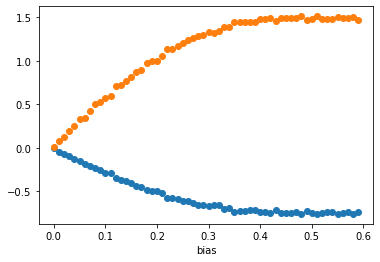

In [74]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0,0.6,0.01), bias[:,0], 'o')
plt.plot(np.arange(0,0.6,0.01), bias[:,1], 'o')
plt.xlabel('lambda')
plt.xlabel('bias')

相関が強くなるほど、推定誤差が大きくなることが確認できる。